# **1. 단항 선형 회귀**
* 한 개의 입력이 들어가서 한 개의 출력이 나오는 구조

In [ ]:
import torch # 오픈 소스 기계 학습 라이브러리 모듈
import torch.nn as nn # nn 이란? 인경신경망을 구현하기 위한 도구와 모듈제공
import torch.optim as optim # optim 이란 다양한 최적화 알고리즘 구현
import matplotlib.pyplot as plt

In [ ]:
# 파이썬 코드를 재실행해도 같은 결과가 나올 수 있도록 랜덤시드를 설정
torch.manual_seed(2024)

In [ ]:
# 실수형태로 저장
X_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

print(X_train, X_train.shape)
print(y_train, y_train.shape)

tensor([[1.],
        [2.],
        [3.]]) torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]]) torch.Size([3, 1])


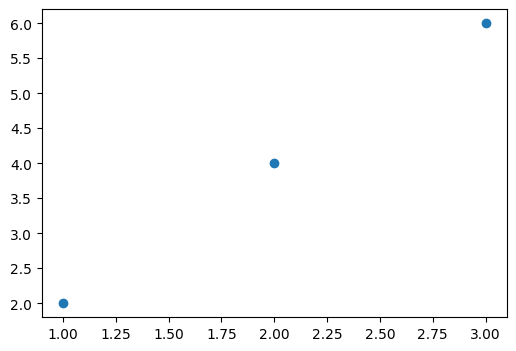

In [ ]:
# 산점도 그림
# x_train x축에 해당하는 입력 데이터 ,y_train y축에 해당하는 목표 변수(타깃)
plt.figure(figsize = (6, 4))
plt.scatter(X_train, y_train)

In [ ]:
# 머신러닝 모델 만들기
# y = wx + b
model = nn.Linear(1, 1) # 데이터를 하나 넣으면 하나 출력 => 직선 그어주는 모델
print(model)

Linear(in_features=1, out_features=1, bias=True)


In [ ]:
# 예측선 긋기
y_pred = model(X_train)
print(y_pred)

tensor([[0.7260],
        [0.7894],
        [0.8528]], grad_fn=<AddmmBackward0>)


In [ ]:
# 기울기와 바이어스가 나옴 # 학습전이라 임의의 값으로 설정됨
print(list(model.parameters()))

# W: 0.0634, b: 0.6625
# y = 0.0634x + 0.6625
# x=1, 0.0634 + 0.6625 = 0.7259
# x=2, (0.0634*2) + 0.6625 = 0.7893

[Parameter containing:
tensor([[0.0634]], requires_grad=True), Parameter containing:
tensor([0.6625], requires_grad=True)]


In [ ]:
# 데이터 [[1],[2]
# W : [[0.0634]] b :[0.6625]
# pred : [[0.7260], [0.7894]

print(0.0634*1 + 0.6625)
print(0.0634*2 + 0.6625)

0.7259
0.7893


In [ ]:
# mse
((y_pred - y_train) ** 2).mean()
# MSE(Mean Squared Error, 평균 제곱 오차)를 계산

tensor(12.8082, grad_fn=<MeanBackward0>)

In [ ]:
# mse 함수있음
# 손실 함수: 예측값과 실제값이 얼마나 차이가 나는지를 측정
loss = nn.MSELoss()(y_pred, y_train)
loss

tensor(12.8082, grad_fn=<MseLossBackward0>)

# **2. 경사하강법(Gradient Descent)**
* 비용 함수의 값을 최소로 하는 W 와 b를 찾는 알고리즘을 "옵티마이저 알고리즘"이라고 함
* 옵티마이저 알고리즘 중 가장 기본적인 기술이 경사하강법

<center><img src='https://i.imgur.com/0fW4LTG.png' width=600></center>

* 옵티마이저 알고리즘을 통해 W와 b를 찾아내는 과정을 "학습"이라고 부름
* 학습률(Learning rate): 한 번 W를 움직이는 거리(increment step)

In [ ]:
# 객체 생성
# SGD(Stochastic Gradient Desent)
# 랜덤하게 데이터를 하나씩 뽑아서 loss를 만듦
# 데이터를 뽑고 다시 데이터에 넣고 반복
# 빠르게 방향을 결정
optimizer = optim.SGD(model.parameters(), lr=0.01)
# 옵티마이저(Optimizer)는 기계 학습 및 딥러닝 모델의 학습 과정에서
# 모델의 가중치(weight)를 업데이트하는 알고리즘

In [ ]:
loss = nn.MSELoss()(y_pred, y_train)

In [ ]:
# gradient를 초기화
optimizer.zero_grad()

# 역전파: 비용함수를 미분하여 gradient(기울기) 계산
loss.backward() # 미분을 취해서 기울기와 절편을 새롭게 찾아냄

# W와 b를 업데이트
optimizer.step()

print(list(model.parameters()))  # W: 0.2177, b: 0.7267
# 전 W: 0.0634, b: 0.6625
# 후 W: 0.2177, b: 0.7267

[Parameter containing:
tensor([[0.2177]], requires_grad=True), Parameter containing:
tensor([0.7267], requires_grad=True)]


In [ ]:
# 반복 학습을 통해 오차가 있는 W, b를 수정하면서 오차를 계속 줄여나감
# epochs: 반복 학습 횟수(에포크)
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(X_train)
    loss = nn.MSELoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 10.171454
Epoch 100/100 Loss: 0.142044
Epoch 200/200 Loss: 0.087774
Epoch 300/300 Loss: 0.054239
Epoch 400/400 Loss: 0.033517
Epoch 500/500 Loss: 0.020711
Epoch 600/600 Loss: 0.012798
Epoch 700/700 Loss: 0.007909
Epoch 800/800 Loss: 0.004887
Epoch 900/900 Loss: 0.003020
Epoch 1000/1000 Loss: 0.001866


In [ ]:
# parameter은 nn.module 클래스 방법( 모델이 가능한 확률을 반환하는 기여를 함)
print(list(model.parameters())) # W:1.9499, b:0.1138

[Parameter containing:
tensor([[1.9499]], requires_grad=True), Parameter containing:
tensor([0.1138], requires_grad=True)]


In [ ]:
X_test = torch.FloatTensor([[5]])
y_pred = model(X_test)
print(y_pred)

# 예측하는 값
# 1.9499 * x + 0.1138

tensor([[9.8635]], grad_fn=<AddmmBackward0>)


In [ ]:
1.9499*5  + 0.1138

9.863299999999999

# **3.다중 선형 회귀**
* 여러 개의 입력이 들어가서 한 개의 출력이 나오는 구조

In [ ]:
X_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70],])

y_train = torch.FloatTensor([[150], [190], [180], [200], [130]])

print(X_train, X_train.shape)
print(y_train, y_train.shape)

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.]]) torch.Size([5, 3])
tensor([[150.],
        [190.],
        [180.],
        [200.],
        [130.]]) torch.Size([5, 1])


In [ ]:
# y = W1x1 + W2x2 + W3x3 ... + b
model = nn.Linear(3,1)
print(model)

Linear(in_features=3, out_features=1, bias=True)


In [ ]:
# 확률적 경사 하강법
optimizer = optim.SGD(model.parameters(),lr=0.00001)

In [ ]:
#학습
epochs = 10000

for epoch in range(epochs + 1):
  y_pred = model(X_train)
  loss = nn.MSELoss()(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch {epoch}/{epoch} Loss: {loss:.6f}')

Epoch 0/0 Loss: 38561.125000
Epoch 100/100 Loss: 43.880661
Epoch 200/200 Loss: 43.343727
Epoch 300/300 Loss: 42.829872
Epoch 400/400 Loss: 42.337685
Epoch 500/500 Loss: 41.866142
Epoch 600/600 Loss: 41.414219
Epoch 700/700 Loss: 40.980984
Epoch 800/800 Loss: 40.565197
Epoch 900/900 Loss: 40.166359
Epoch 1000/1000 Loss: 39.783215
Epoch 1100/1100 Loss: 39.415241
Epoch 1200/1200 Loss: 39.061520
Epoch 1300/1300 Loss: 38.721352
Epoch 1400/1400 Loss: 38.394039
Epoch 1500/1500 Loss: 38.079037
Epoch 1600/1600 Loss: 37.775555
Epoch 1700/1700 Loss: 37.483067
Epoch 1800/1800 Loss: 37.201080
Epoch 1900/1900 Loss: 36.929047
Epoch 2000/2000 Loss: 36.666267
Epoch 2100/2100 Loss: 36.412544
Epoch 2200/2200 Loss: 36.167397
Epoch 2300/2300 Loss: 35.930252
Epoch 2400/2400 Loss: 35.700775
Epoch 2500/2500 Loss: 35.478638
Epoch 2600/2600 Loss: 35.263390
Epoch 2700/2700 Loss: 35.054775
Epoch 2800/2800 Loss: 34.852394
Epoch 2900/2900 Loss: 34.656013
Epoch 3000/3000 Loss: 34.465225
Epoch 3100/3100 Loss: 34.2799

In [ ]:
print(list(model.parameters())) # W: [0.3478, 0.6414, 1.0172], b:[-0.2856]

[Parameter containing:
tensor([[0.3478, 0.6414, 1.0172]], requires_grad=True), Parameter containing:
tensor([-0.2856], requires_grad=True)]


In [ ]:
# 93, 93, 93 예측
x_test = torch.FloatTensor([[93 ,93, 93]])
y_pred=model(x_test)
print(y_pred)

tensor([[186.3026]], grad_fn=<AddmmBackward0>)


In [ ]:
X_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],  # ====> 이정도로 비슷
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70],])

y_train = torch.FloatTensor([[150], [190], [180], [200], [130]]) # => [190], [180] 그쯤

# **4. temps.csv 데이터에서 기온에 따른 지면 온도를 예측해보기**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KDT/6. 머신러닝과 딥러닝/Data/temps.csv', encoding='ms949')
df

,지점,지점명,일시,기온(°C),지면온도(°C)
0,232,천안,2020-01-01 01:00,-8.7,-2.9
1,232,천안,2020-01-01 02:00,-7.3,-2.4
2,232,천안,2020-01-01 03:00,-6.7,-2.2
3,232,천안,2020-01-01 04:00,-6.2,-2.0
4,232,천안,2020-01-01 05:00,-5.9,-1.9
...,...,...,...,...,...
8777,232,천안,2020-12-31 19:00,-6.6,-0.6
8778,232,천안,2020-12-31 20:00,-6.4,-0.7
8779,232,천안,2020-12-31 21:00,-7.3,-1.2
8780,232,천안,2020-12-31 22:00,-9.0,-1.5


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().mean()

지점          0.0
지점명         0.0
일시          0.0
기온(°C)      0.0
지면온도(°C)    0.0
dtype: float64

In [ ]:
x_data = df[['기온(°C)']]
y_data = df[['지면온도(°C)']]

In [ ]:
x_data = torch.FloatTensor(x_data.values)
y_data = torch.FloatTensor(y_data.values)
print(x_data.shape)
print(y_data.shape)

torch.Size([8779, 1])
torch.Size([8779, 1])


In [ ]:
x_data

tensor([[-8.7000],
        [-7.3000],
        [-6.7000],
        ...,
        [-7.3000],
        [-9.0000],
        [-9.2000]])

In [ ]:
y_data

tensor([[-2.9000],
        [-2.4000],
        [-2.2000],
        ...,
        [-1.2000],
        [-1.5000],
        [-1.2000]])

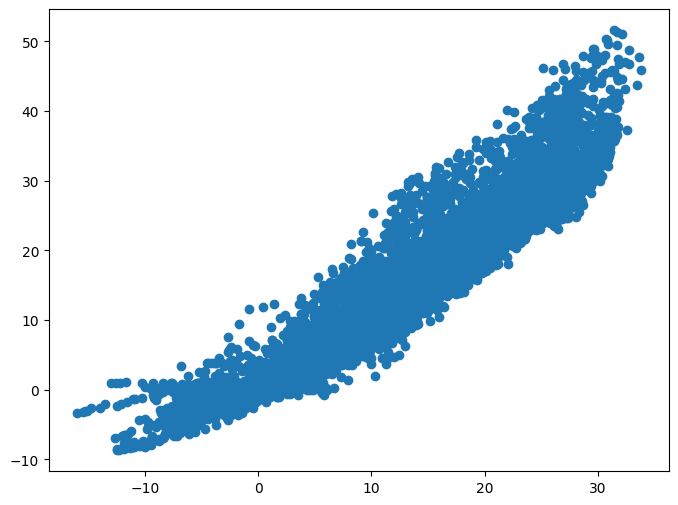

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data)

In [ ]:
model = nn.Linear(1, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
print(list(model.parameters())) # W: -0.5700, b: 0.2403

[Parameter containing:
tensor([[-0.5700]], requires_grad=True), Parameter containing:
tensor([0.2403], requires_grad=True)]


In [ ]:
epochs = 10000

for epoch in range(epochs + 1):
    y_pred = model(x_data)
    loss = nn.MSELoss()(y_pred, y_data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs} Loss: {loss:.6f}')

Epoch: 0/10000 Loss: 727.285767
Epoch: 100/10000 Loss: 13.042105
Epoch: 200/10000 Loss: 13.029263
Epoch: 300/10000 Loss: 13.018347
Epoch: 400/10000 Loss: 13.009065
Epoch: 500/10000 Loss: 13.001172
Epoch: 600/10000 Loss: 12.994462
Epoch: 700/10000 Loss: 12.988756
Epoch: 800/10000 Loss: 12.983907
Epoch: 900/10000 Loss: 12.979782
Epoch: 1000/10000 Loss: 12.976276
Epoch: 1100/10000 Loss: 12.973297
Epoch: 1200/10000 Loss: 12.970764
Epoch: 1300/10000 Loss: 12.968608
Epoch: 1400/10000 Loss: 12.966776
Epoch: 1500/10000 Loss: 12.965218
Epoch: 1600/10000 Loss: 12.963895
Epoch: 1700/10000 Loss: 12.962769
Epoch: 1800/10000 Loss: 12.961811
Epoch: 1900/10000 Loss: 12.960998
Epoch: 2000/10000 Loss: 12.960305
Epoch: 2100/10000 Loss: 12.959718
Epoch: 2200/10000 Loss: 12.959216
Epoch: 2300/10000 Loss: 12.958792
Epoch: 2400/10000 Loss: 12.958429
Epoch: 2500/10000 Loss: 12.958122
Epoch: 2600/10000 Loss: 12.957862
Epoch: 2700/10000 Loss: 12.957641
Epoch: 2800/10000 Loss: 12.957451
Epoch: 2900/10000 Loss: 1

In [ ]:
list(model.parameters()) # W: 1.0854, b: 0.8199

[Parameter containing:
 tensor([[1.0854]], requires_grad=True),
 Parameter containing:
 tensor([0.8198], requires_grad=True)]

In [ ]:
y_pred = model(x_data).detach().numpy()
y_pred

array([[-8.623071],
       [-7.103529],
       [-6.452296],
       ...,
       [-7.103529],
       [-8.948688],
       [-9.165765]], dtype=float32)

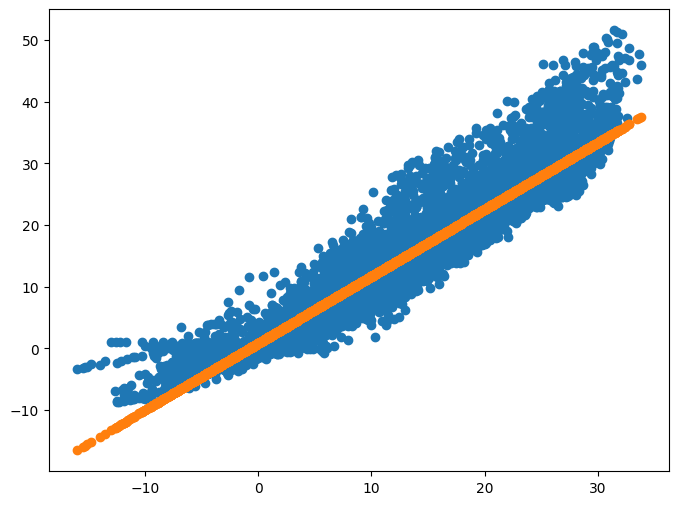

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data)
plt.scatter(x_data, y_pred)

In [ ]:
result = model(torch.FloatTensor([[26]]))
result

tensor([[29.0399]], grad_fn=<AddmmBackward0>)